### Save by class

In [1]:
import json
import os

# Path to the JSON file
json_path = '/n/netscratch/konkle_lab/Everyone/Jingxuan/DiffusionObjectRelation/T2I-CompBench-main/examples/labels/annotation_obj_detection_2d/detailed_scores.json'

# Function to load and analyze the JSON data
def analyze_scores(json_file):
    # Check if file exists
    if not os.path.exists(json_file):
        print(f"Error: File {json_file} not found.")
        return
    
    try:
        # Load the JSON data
        with open(json_file, 'r') as f:
            data = json.load(f)
            
        # Initialize lists to store question_ids for each case
        case1_ids = []  # Either object detected is False
        case2_ids = []  # Both objects detected is True but spatial score is 0
        case3_ids = []  # Both objects detected is True and spatial score is 1
        
        # Analyze each sample
        for sample in data:
            question_id = sample.get('question_id')
            obj1_detected = sample.get('obj1_detected')
            obj2_detected = sample.get('obj2_detected')
            spatial_score = sample.get('spatial_relationship_score')
            
            # Case 1: Either object detected is False
            if not obj1_detected or not obj2_detected:
                case1_ids.append(question_id)
            
            # Case 2: Both objects detected is True but spatial score is 0
            elif obj1_detected and obj2_detected and spatial_score == 0:
                case2_ids.append(question_id)
            
            # Case 3: Both objects detected is True and spatial score is 1
            elif obj1_detected and obj2_detected and spatial_score == 1:
                case3_ids.append(question_id)
        
        # Print the results
        print(f"Case 1 (Either object not detected): {len(case1_ids)} samples found")
        print(f"Question IDs: {case1_ids[:20]}..." if len(case1_ids) > 20 else f"Question IDs: {case1_ids}")
        
        print(f"\nCase 2 (Both objects detected but spatial score is 0): {len(case2_ids)} samples found")
        print(f"Question IDs: {case2_ids[:20]}..." if len(case2_ids) > 20 else f"Question IDs: {case2_ids}")
        
        print(f"\nCase 3 (Both objects detected and spatial score is 1): {len(case3_ids)} samples found")
        print(f"Question IDs: {case3_ids[:20]}..." if len(case3_ids) > 20 else f"Question IDs: {case3_ids}")
        
        # Return the results
        return {
            'case1_ids': case1_ids,
            'case2_ids': case2_ids,
            'case3_ids': case3_ids
        }
        
    except json.JSONDecodeError:
        print(f"Error: File {json_file} is not a valid JSON file.")
    except Exception as e:
        print(f"Error: {e}")


In [2]:
id_groups = analyze_scores(json_path)

Case 1 (Either object not detected): 549 samples found
Question IDs: [1, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 19, 21, 24, 32, 34, 35, 36, 38, 39]...

Case 2 (Both objects detected but spatial score is 0): 205 samples found
Question IDs: [2, 3, 20, 22, 23, 26, 31, 37, 46, 48, 59, 63, 64, 67, 68, 80, 83, 85, 92, 93]...

Case 3 (Both objects detected and spatial score is 1): 188 samples found
Question IDs: [4, 10, 12, 18, 25, 27, 28, 29, 33, 41, 53, 70, 72, 77, 78, 81, 86, 89, 105, 108]...


In [3]:
with open('id_groups.json', 'w') as f:
    json.dump(id_groups, f)

In [5]:
id_groups['case2_ids']

[2,
 3,
 20,
 22,
 23,
 26,
 31,
 37,
 46,
 48,
 59,
 63,
 64,
 67,
 68,
 80,
 83,
 85,
 92,
 93,
 94,
 95,
 99,
 106,
 127,
 138,
 148,
 150,
 151,
 154,
 156,
 166,
 167,
 169,
 170,
 174,
 176,
 182,
 183,
 192,
 198,
 203,
 219,
 220,
 223,
 228,
 247,
 249,
 253,
 261,
 263,
 266,
 267,
 286,
 292,
 293,
 297,
 304,
 305,
 310,
 312,
 321,
 323,
 348,
 351,
 362,
 373,
 376,
 381,
 382,
 383,
 389,
 391,
 393,
 395,
 396,
 403,
 405,
 410,
 413,
 414,
 417,
 421,
 426,
 430,
 431,
 450,
 456,
 459,
 461,
 464,
 478,
 482,
 483,
 486,
 489,
 496,
 507,
 515,
 518,
 519,
 523,
 527,
 528,
 535,
 538,
 539,
 547,
 553,
 555,
 559,
 562,
 564,
 567,
 568,
 575,
 584,
 591,
 592,
 593,
 595,
 605,
 609,
 619,
 623,
 632,
 637,
 641,
 643,
 650,
 653,
 657,
 660,
 664,
 670,
 679,
 681,
 683,
 684,
 689,
 690,
 692,
 693,
 699,
 704,
 705,
 709,
 712,
 718,
 726,
 731,
 740,
 741,
 746,
 748,
 761,
 767,
 769,
 770,
 781,
 785,
 786,
 797,
 798,
 803,
 809,
 812,
 819,
 824,
 826,
 834,

In [6]:
id_groups['case3_ids']

[4,
 10,
 12,
 18,
 25,
 27,
 28,
 29,
 33,
 41,
 53,
 70,
 72,
 77,
 78,
 81,
 86,
 89,
 105,
 108,
 114,
 118,
 130,
 131,
 135,
 137,
 152,
 153,
 155,
 165,
 168,
 171,
 173,
 179,
 181,
 201,
 202,
 204,
 205,
 213,
 216,
 221,
 222,
 235,
 236,
 238,
 242,
 243,
 244,
 245,
 254,
 255,
 259,
 269,
 280,
 281,
 284,
 291,
 298,
 300,
 303,
 306,
 313,
 320,
 324,
 326,
 327,
 328,
 331,
 340,
 341,
 345,
 346,
 350,
 353,
 359,
 366,
 371,
 378,
 379,
 380,
 387,
 388,
 392,
 400,
 406,
 415,
 422,
 436,
 442,
 445,
 447,
 453,
 460,
 467,
 470,
 476,
 477,
 479,
 480,
 481,
 487,
 495,
 503,
 504,
 513,
 514,
 520,
 529,
 534,
 537,
 541,
 542,
 548,
 560,
 570,
 576,
 577,
 585,
 586,
 587,
 597,
 602,
 604,
 608,
 624,
 627,
 630,
 633,
 635,
 640,
 642,
 644,
 658,
 665,
 667,
 668,
 669,
 676,
 688,
 691,
 696,
 698,
 701,
 702,
 717,
 722,
 734,
 737,
 739,
 750,
 751,
 753,
 754,
 755,
 772,
 773,
 776,
 779,
 783,
 802,
 806,
 808,
 811,
 814,
 833,
 849,
 856,
 864,
 872,

### Examine correct objects class for single seed

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Read the detailed scores
score_path = '../examples/labels/2025-05-10_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed1/annotation_obj_detection_2d'
with open(score_path + '/detailed_scores.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter entries where both objects are correctly generated
df_correct_objects = df[(df['obj1_detected'] == True) & (df['obj2_detected'] == True)]

# Save filtered entries
df_correct_objects.to_json(score_path + '/detailed_scores_correct_obj.json', orient='records', indent=2)




Summary Statistics:
Total number of entries: 1000
Number of entries with both objects detected: 459

Unique objects: 36
Unique spatial relationships: 7

Spatial relationships:
- on the right of
- near
- on the top of
- next to
- on the bottom of
- on the left of
- on side of


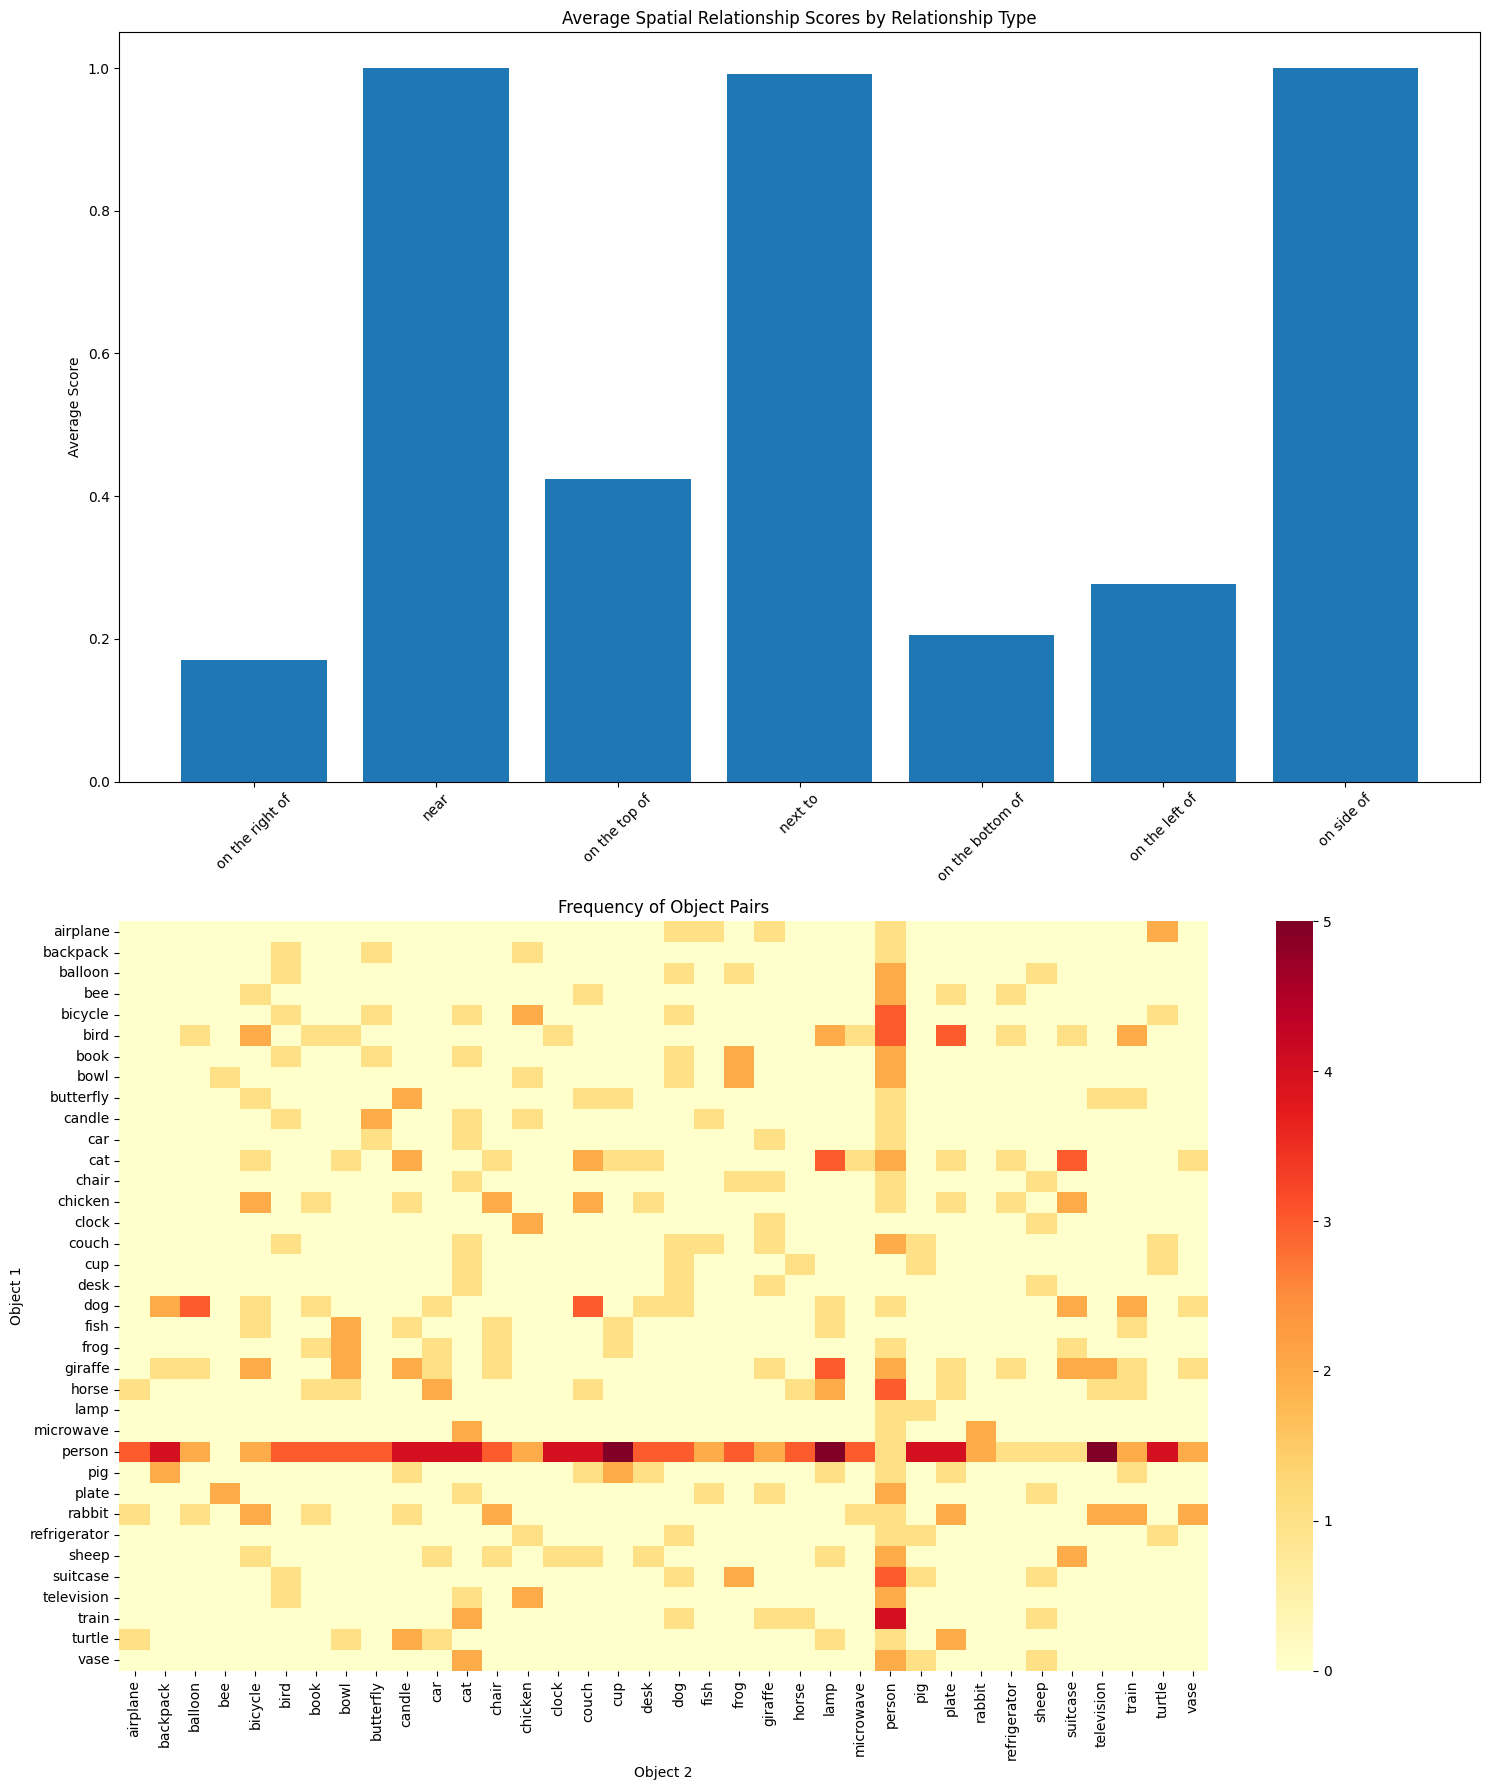

In [8]:
# Get unique objects and spatial relationships
unique_obj1 = set(df_correct_objects['obj1'].unique())
unique_obj2 = set(df_correct_objects['obj2'].unique())
unique_objects = unique_obj1.union(unique_obj2)
unique_relationships = set(df_correct_objects['locality'].unique())

# Create a matrix of spatial relationship scores
relationship_matrix = defaultdict(lambda: defaultdict(list))

for _, row in df_correct_objects.iterrows():
    relationship_matrix[row['locality']][(row['obj1'], row['obj2'])].append(row['spatial_relationship_score'])

# Calculate average scores for each relationship-object combination
avg_scores = {}
for rel in unique_relationships:
    for (obj1, obj2), scores in relationship_matrix[rel].items():
        if scores:  # Only include if there are scores
            avg_scores[(rel, obj1, obj2)] = sum(scores) / len(scores)

# Create visualizations
plt.figure(figsize=(15, 18))

# 1. Bar plot of average spatial relationship scores by relationship type
rel_scores = defaultdict(list)
for (rel, _, _), score in avg_scores.items():
    rel_scores[rel].append(score)

plt.subplot(2, 1, 1)
rel_means = {rel: sum(scores)/len(scores) for rel, scores in rel_scores.items()}
plt.bar(rel_means.keys(), rel_means.values())
plt.title('Average Spatial Relationship Scores by Relationship Type')
plt.xticks(rotation=45)
plt.ylabel('Average Score')

# 2. Heatmap of object pair frequencies
obj_pairs = defaultdict(int)
for (_, obj1, obj2), _ in avg_scores.items():
    obj_pairs[(obj1, obj2)] += 1

# Convert to matrix format
obj_list = sorted(list(unique_objects))
pair_matrix = pd.DataFrame(0, index=obj_list, columns=obj_list)
for (obj1, obj2), count in obj_pairs.items():
    pair_matrix.loc[obj1, obj2] = count

plt.subplot(2, 1, 2)
sns.heatmap(pair_matrix, cmap='YlOrRd')
plt.title('Frequency of Object Pairs')
plt.xlabel('Object 2')
plt.ylabel('Object 1')

plt.tight_layout()
#plt.savefig('spatial_relationship_analysis.png')
#plt.close()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of entries: {len(df)}")
print(f"Number of entries with both objects detected: {len(df_correct_objects)}")
print(f"\nUnique objects: {len(unique_objects)}")
print(f"Unique spatial relationships: {len(unique_relationships)}")
print("\nSpatial relationships:")
for rel in unique_relationships:
    print(f"- {rel}") 

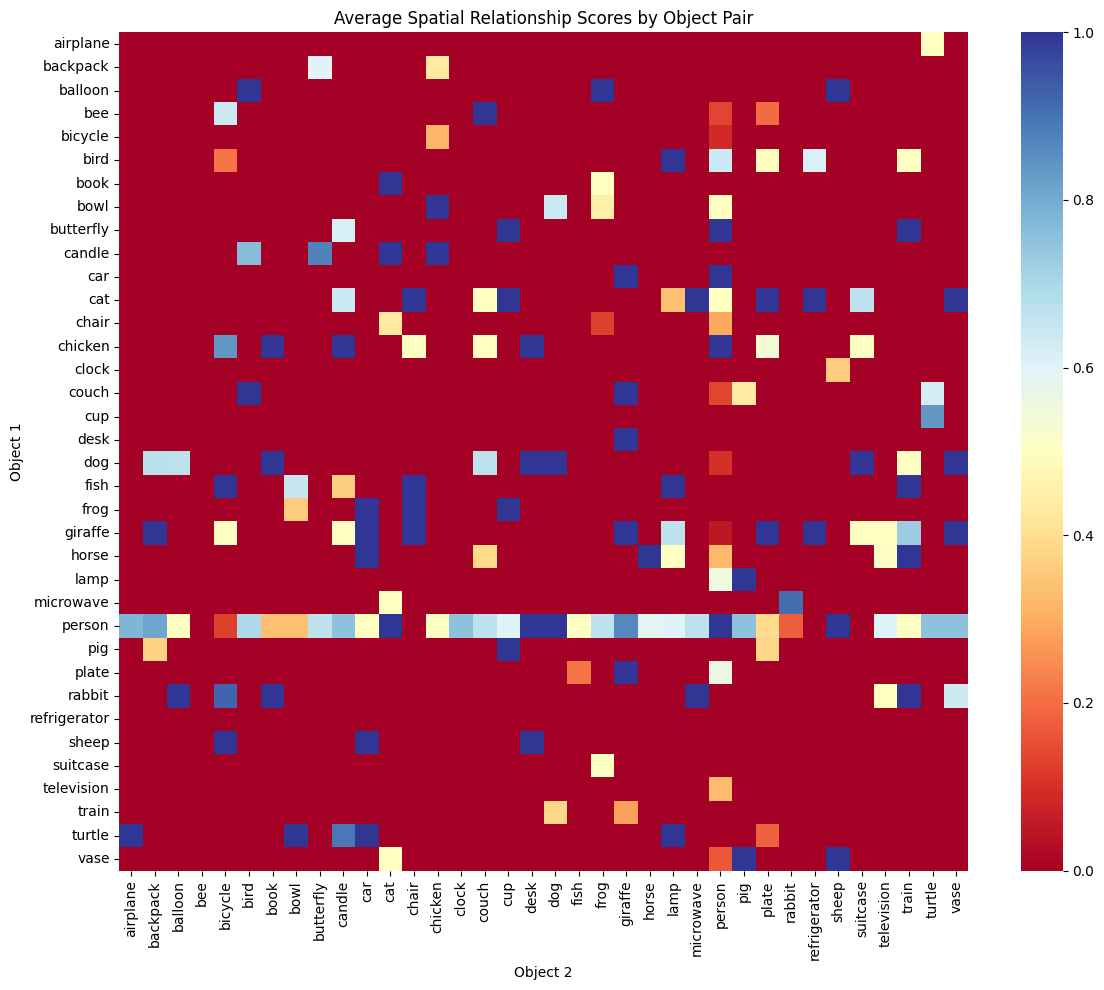

In [7]:
# Calculate average spatial scores for each object pair
obj_pair_scores = defaultdict(list)
for (_, obj1, obj2), score in avg_scores.items():
    obj_pair_scores[(obj1, obj2)].append(score)

# Calculate average scores
avg_pair_scores = {}
for (obj1, obj2), scores in obj_pair_scores.items():
    avg_pair_scores[(obj1, obj2)] = sum(scores) / len(scores)

# Convert to matrix format
obj_list = sorted(list(unique_objects))
score_matrix = pd.DataFrame(0.0, index=obj_list, columns=obj_list)
for (obj1, obj2), score in avg_pair_scores.items():
    score_matrix.loc[obj1, obj2] = score

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(score_matrix, cmap='RdYlBu', center=0.5, vmin=0, vmax=1)
plt.title('Average Spatial Relationship Scores by Object Pair')
plt.xlabel('Object 2')
plt.ylabel('Object 1')
plt.tight_layout()
plt.show()

### Combine across seeds


Per-seed average detection score:


,seed,avg_detection_score,n_entries
0,1,0.467105,76
1,2,0.453947,76
2,3,0.473684,76
3,4,0.427632,76
4,5,0.440789,76
5,6,0.473684,76
6,7,0.467105,76
7,8,0.473684,76
8,9,0.460526,76
9,10,0.460526,76



Per-prompt average detection score across seeds:


,prompt,avg_detection_score_across_seeds,n_seeds_present,min_across_seeds,max_across_seeds
0,a person on the top of a car,0.95,10,0.5,1.0
1,a woman on the left of a horse,0.95,10,0.5,1.0
2,a boy next to a couch,0.90,10,0.5,1.0
3,a boy near a pig,0.75,10,0.5,1.0
4,a man on the left of a giraffe,0.75,10,0.5,1.0
5,a girl on the left of a giraffe,0.70,10,0.5,1.0
6,a dog near a couch,0.65,10,0.5,1.0
7,a woman on the bottom of a bird,0.60,10,0.5,1.0
8,a woman on the bottom of a bowl,0.60,10,0.0,1.0
9,a girl on the right of a microwave,0.60,10,0.0,1.0



...and bottom-20 (hardest) prompts:


,prompt,avg_detection_score_across_seeds,n_seeds_present,min_across_seeds,max_across_seeds
56,a bag on the left of a bee,0.45,10,0.0,0.5
57,a cup on the right of a bee,0.45,10,0.0,0.5
58,a giraffe on the left of a backpack,0.45,10,0.0,0.5
59,a frog on the right of a car,0.45,10,0.0,0.5
60,a mouse on the top of a bicycle,0.45,10,0.0,0.5
61,a fish on the bottom of a train,0.40,10,0.0,0.5
62,a microwave on the right of a bee,0.40,10,0.0,0.5
63,a mouse on the top of a refrigerator,0.35,10,0.0,0.5
64,a wallet on the top of a bee,0.35,10,0.0,0.5
65,a bird on the right of a microwave,0.30,10,0.0,1.0


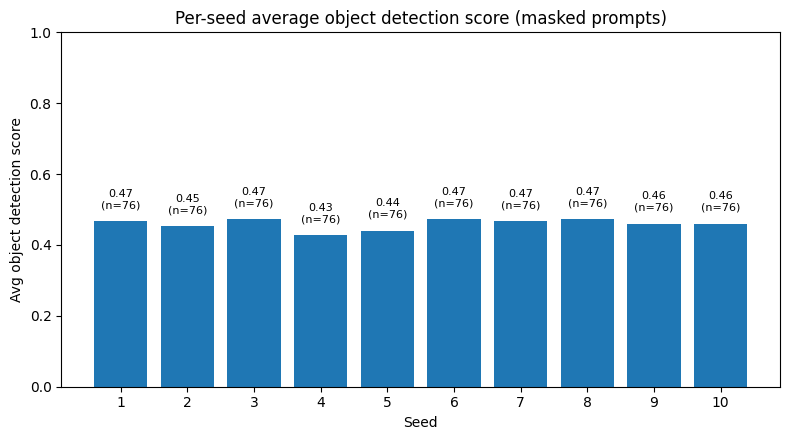

/tmp/ipykernel_4114840/1406363917.py:136: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(seed_lists, labels=seed_labels, showfliers=False)


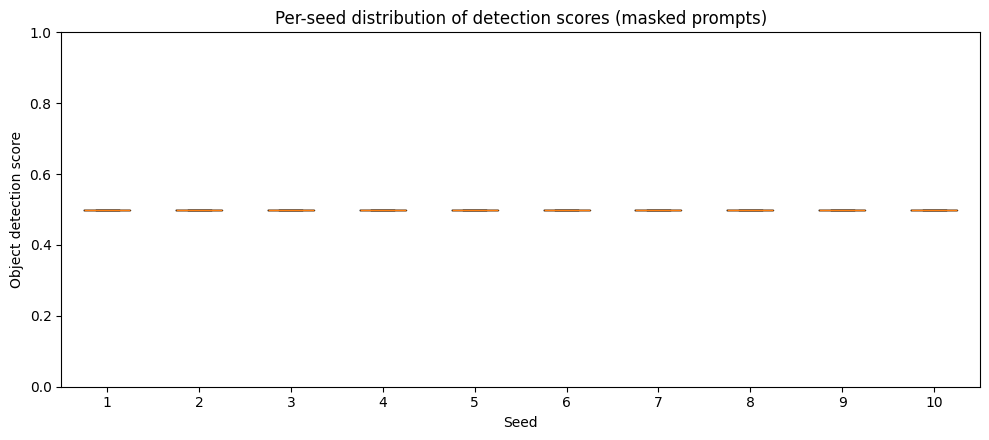

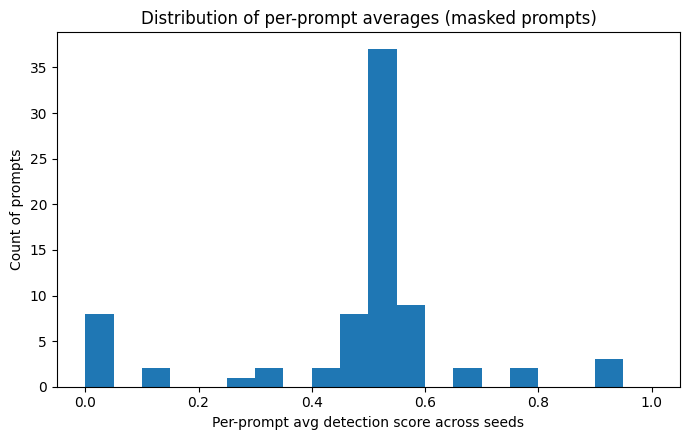

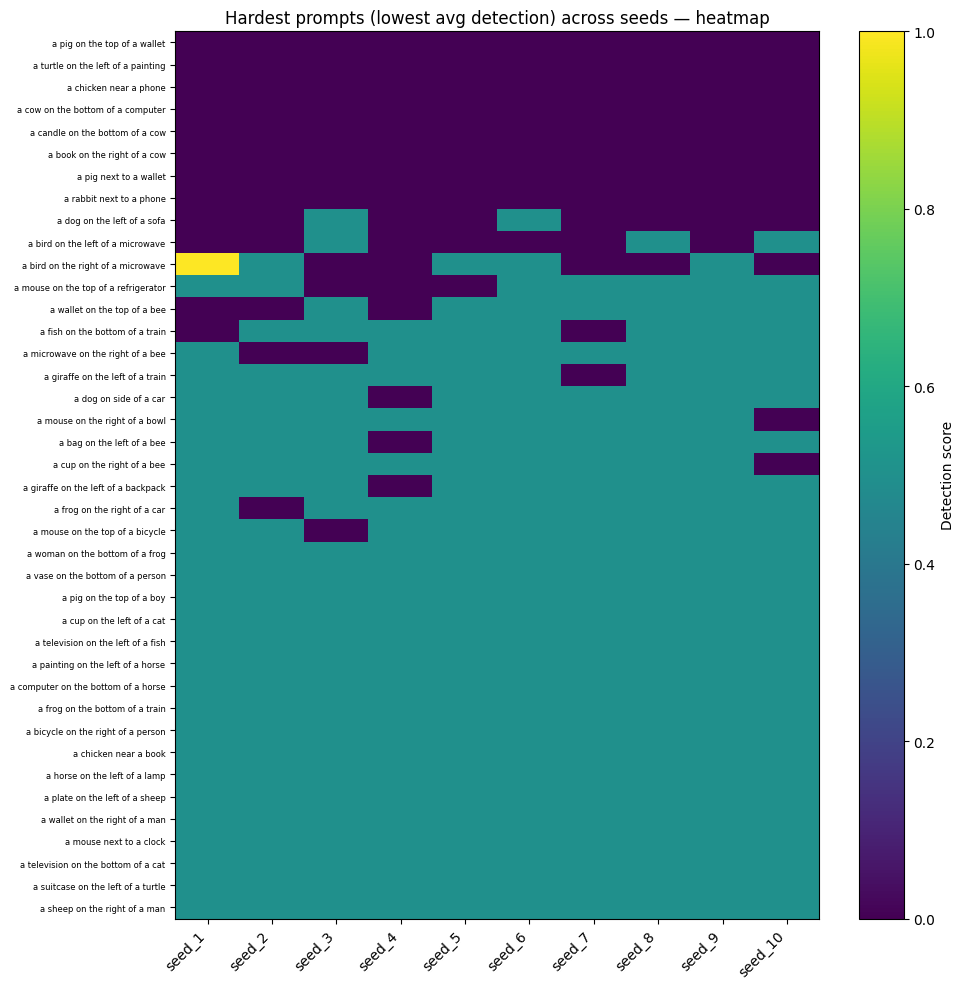

In [1]:
import os
import json
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# ----------------------------
# Config (matches your layout)
# ----------------------------
root_dir  = "../examples/labels/2025-09-06_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"
#root_dir2 = "../examples/labels/2025-05-10_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"

# Build per-seed file map (1–5 from root_dir, 6–10 from root_dir2)
seed_to_file = {}
for s in range(1, 11):
    base = root_dir 
    seed_to_file[s] = os.path.join(f"{base}{s}_MASKED", "annotation_obj_detection_2d", "detailed_scores.json")

# ----------------------------
# Helpers
# ----------------------------
def obj_detection_score(entry) -> float:
    """
    Both detected -> 1.0
    Exactly one detected -> 0.5
    None -> 0.0
    """
    d1 = 1 if entry.get("obj1_detected", False) else 0
    d2 = 1 if entry.get("obj2_detected", False) else 0
    return 0.5 * (d1 + d2)

# ----------------------------
# Read data
# ----------------------------
scores_by_seed = defaultdict(list)     # seed -> list of entry scores
seed_prompt_scores = defaultdict(list) # (seed, prompt) -> list of scores (if multiple images per prompt per seed)

missing = []
for seed, fp in seed_to_file.items():
    if not os.path.isfile(fp):
        missing.append((seed, fp))
        continue

    with open(fp, "r") as f:
        data = json.load(f)

    for entry in data:
        score = obj_detection_score(entry)
        scores_by_seed[seed].append(score)
        seed_prompt_scores[(seed, entry["prompt"])].append(score)

if missing:
    print("WARNING: Missing seed files:")
    for seed, fp in missing:
        print(f"  - seed {seed}: {fp}")

# ----------------------------
# (1) Per-seed average detection score
# ----------------------------
seed_rows = []
for seed in sorted(scores_by_seed.keys()):
    vals = np.array(scores_by_seed[seed], dtype=float)
    seed_rows.append({
        "seed": seed,
        "avg_detection_score": float(vals.mean()) if len(vals) else np.nan,
        "n_entries": int(len(vals))
    })
seed_df = pd.DataFrame(seed_rows).sort_values("seed").reset_index(drop=True)

print("\nPer-seed average detection score:")
display(seed_df)

# ----------------------------
# (2) Per-prompt average detection score across seeds
#     First mean per (seed,prompt), then average those across seeds.
# ----------------------------
seed_prompt_mean = {k: float(np.mean(v)) for k, v in seed_prompt_scores.items()}  # (seed,prompt) -> mean

prompt_seed_values = defaultdict(list)  # prompt -> list of per-seed means
for (seed, prompt), v in seed_prompt_mean.items():
    prompt_seed_values[prompt].append(v)

prompt_rows = []
for prompt, vals in prompt_seed_values.items():
    arr = np.array(vals, dtype=float)
    prompt_rows.append({
        "prompt": prompt,
        "avg_detection_score_across_seeds": float(arr.mean()),
        "n_seeds_present": int(arr.size),
        "min_across_seeds": float(arr.min()),
        "max_across_seeds": float(arr.max())
    })
prompt_df = pd.DataFrame(prompt_rows).sort_values(
    "avg_detection_score_across_seeds", ascending=False
).reset_index(drop=True)

print("\nPer-prompt average detection score across seeds:")
display(prompt_df.head(20))  # show top-20 easiest prompts
print("\n...and bottom-20 (hardest) prompts:")
display(prompt_df.tail(20))

# ----------------------------
# PLOTS (no saving, just show)
# ----------------------------

# 1) Bar chart: per-seed average detection score
seed_df_plot = seed_df.dropna(subset=["avg_detection_score"])
if not seed_df_plot.empty:
    plt.figure(figsize=(8, 4.5))
    plt.bar(seed_df_plot["seed"].astype(str), seed_df_plot["avg_detection_score"])
    plt.xlabel("Seed")
    plt.ylabel("Avg object detection score")
    plt.title("Per-seed average object detection score (masked prompts)")
    plt.ylim(0, 1)
    # annotate
    for x, y, n in zip(seed_df_plot["seed"].astype(str),
                       seed_df_plot["avg_detection_score"],
                       seed_df_plot["n_entries"]):
        plt.text(x, min(1.0, y + 0.03), f"{y:.2f}\n(n={n})",
                 ha="center", va="bottom", fontsize=8)
    plt.tight_layout()
    plt.show()
else:
    print("No per-seed data to plot.")

# 2) Boxplot: distribution of scores per seed (across prompts/images)
if any(len(v) for v in scores_by_seed.values()):
    seed_labels = []
    seed_lists = []
    for seed in sorted(scores_by_seed.keys()):
        seed_labels.append(str(seed))
        seed_lists.append(scores_by_seed[seed])
    plt.figure(figsize=(10, 4.5))
    plt.boxplot(seed_lists, labels=seed_labels, showfliers=False)
    plt.xlabel("Seed")
    plt.ylabel("Object detection score")
    plt.title("Per-seed distribution of detection scores (masked prompts)")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    print("No distributions to plot.")

# 3) Histogram: distribution of per-prompt averages across seeds
if not prompt_df.empty:
    plt.figure(figsize=(7, 4.5))
    plt.hist(prompt_df["avg_detection_score_across_seeds"], bins=np.linspace(0, 1, 21))
    plt.xlabel("Per-prompt avg detection score across seeds")
    plt.ylabel("Count of prompts")
    plt.title("Distribution of per-prompt averages (masked prompts)")
    plt.tight_layout()
    plt.show()
else:
    print("No per-prompt averages to plot.")

# 4) Heatmap of 'hardest' prompts (lowest averages) across seeds
if not prompt_df.empty:
    # construct prompt × seed matrix from seed_prompt_mean
    seeds_sorted = sorted({seed for (seed, _) in seed_prompt_mean.keys()})
    prompts_sorted = prompt_df["prompt"].tolist()

    matrix = []
    for prompt in prompts_sorted:
        row = []
        for seed in seeds_sorted:
            row.append(seed_prompt_mean.get((seed, prompt), np.nan))
        matrix.append(row)

    mat_df = pd.DataFrame(matrix, index=prompts_sorted, columns=[f"seed_{s}" for s in seeds_sorted])

    K = min(40, len(mat_df))  # show up to 40 hardest for readability
    hardest = prompt_df.nsmallest(K, "avg_detection_score_across_seeds")["prompt"].tolist()
    hard_mat = mat_df.loc[hardest]

    plt.figure(figsize=(10, max(4, 0.25 * K)))
    plt.imshow(hard_mat.values, aspect="auto", interpolation="nearest", vmin=0, vmax=1)
    plt.colorbar(label="Detection score")
    plt.yticks(ticks=np.arange(len(hardest)), labels=hardest, fontsize=6)
    plt.xticks(ticks=np.arange(len(seeds_sorted)), labels=[f"seed_{s}" for s in seeds_sorted], rotation=45, ha="right")
    plt.title("Hardest prompts (lowest avg detection) across seeds — heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("No heatmap to show (empty prompt_df).")


In [7]:
import os
import json
import numpy as np
from collections import defaultdict

# Map each seed to its detailed_scores.json
# Adjust base(s) and range as needed
# root_dir  = "../examples/labels/2025-05-06_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"
# #root_dir2 = "../examples/labels/2025-05-10_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"

# seed_to_file = {}
# for s in range(1, 11):
#     base = root_dir #if s <= 5 else root_dir2
#     seed_to_file[s] = os.path.join(f"{base}{s}", "annotation_obj_detection_2d", "detailed_scores.json")

root_dir  = "../examples/labels/2025-09-07_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"
#root_dir2 = "../examples/labels/2025-05-10_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"

# Build per-seed file map (1–5 from root_dir, 6–10 from root_dir2)
seed_to_file = {}
for s in range(1, 11):
    base = root_dir 
    seed_to_file[s] = os.path.join(f"{base}{s}_MASKED_eos", "annotation_obj_detection_2d", "detailed_scores.json")


#print(seed_to_file)
# Collect per-(seed,prompt) values
per_seed_prompt_detection = defaultdict(list)
per_seed_prompt_spatial = defaultdict(list)

for seed, fp in seed_to_file.items():
    if not os.path.isfile(fp):
        print(1)
        continue
    with open(fp, "r") as f:
        data = json.load(f)

    for entry in data:
        prompt = entry["prompt"]
        d1 = 1 if entry.get("obj1_detected", False) else 0
        d2 = 1 if entry.get("obj2_detected", False) else 0
        detection_score = 0.5 * (d1 + d2)
        per_seed_prompt_detection[(seed, prompt)].append(detection_score)

        if "spatial_relationship_score" in entry and entry["spatial_relationship_score"] is not None:
            try:
                per_seed_prompt_spatial[(seed, prompt)].append(float(entry["spatial_relationship_score"]))
            except (TypeError, ValueError):
                pass

# First average per (seed, prompt), then average across seeds
prompt_to_seed_detection_means = defaultdict(list)
prompt_to_seed_spatial_means = defaultdict(list)

for (seed, prompt), vals in per_seed_prompt_detection.items():
    if vals:
        prompt_to_seed_detection_means[prompt].append(float(np.mean(vals)))

for (seed, prompt), vals in per_seed_prompt_spatial.items():
    if vals:
        prompt_to_seed_spatial_means[prompt].append(float(np.mean(vals)))

# Build final prompt -> scores map
prompt_to_scores = {}
all_prompts = set(prompt_to_seed_detection_means.keys()) | set(prompt_to_seed_spatial_means.keys())

for prompt in sorted(all_prompts):
    out = {}
    if prompt in prompt_to_seed_detection_means:
        arr = np.array(prompt_to_seed_detection_means[prompt], dtype=float)
        out["avg_detection_score_across_seeds"] = float(arr.mean())
        out["n_seeds_detection"] = int(arr.size)
    if prompt in prompt_to_seed_spatial_means:
        arr = np.array(prompt_to_seed_spatial_means[prompt], dtype=float)
        out["avg_spatial_relationship_score_across_seeds"] = float(arr.mean())
        out["n_seeds_spatial"] = int(arr.size)
    prompt_to_scores[prompt] = out

# Optional: save to disk
out_path = "/n/home13/xupan/sompolinsky_lab/DiffusionObjectRelation/T2I-CompBench-main/UniDet_eval/prompt_to_scores.json"
with open(out_path, "w") as f:
    json.dump(prompt_to_scores, f, indent=2, ensure_ascii=False)

print(f"Wrote {len(prompt_to_scores)} prompts to {out_path}")

Wrote 76 prompts to /n/home13/xupan/sompolinsky_lab/DiffusionObjectRelation/T2I-CompBench-main/UniDet_eval/prompt_to_scores.json


In [8]:
import numpy as np
from collections import OrderedDict

# Compute across-prompt means/SEMs from the already-built prompt_to_scores
detection_vals = [
    v["avg_detection_score_across_seeds"]
    for v in prompt_to_scores.values()
    if "avg_detection_score_across_seeds" in v
]
spatial_vals = [
    v["avg_spatial_relationship_score_across_seeds"]
    for v in prompt_to_scores.values()
    if "avg_spatial_relationship_score_across_seeds" in v
]

def mean_and_sem(values):
    if not values:
        return None, None
    arr = np.array(values, dtype=float)
    mean = float(arr.mean())
    sem = float(arr.std(ddof=1) / np.sqrt(arr.size)) if arr.size > 1 else None
    return mean, sem

det_mean, det_sem = mean_and_sem(detection_vals)
sp_mean, sp_sem = mean_and_sem(spatial_vals)

# Build ordered output: summary first, then individual prompts
out_obj = OrderedDict()
out_obj["summary"] = {
    "n_prompts_detection": len(detection_vals),
    "detection_mean": det_mean,
    "detection_sem": det_sem,
    "n_prompts_spatial": len(spatial_vals),
    "spatial_mean": sp_mean,
    "spatial_sem": sp_sem,
}

# Append per-prompt entries after summary at top level
out_obj.update(prompt_to_scores)

# Save
out_path = "/n/home13/xupan/sompolinsky_lab/DiffusionObjectRelation/T2I-CompBench-main/UniDet_eval/prompt_to_scores.json"
with open(out_path, "w") as f:
    json.dump(out_obj, f, indent=2, ensure_ascii=False)

print(f"Wrote summary + {len(prompt_to_scores)} prompts to {out_path}")

Wrote summary + 76 prompts to /n/home13/xupan/sompolinsky_lab/DiffusionObjectRelation/T2I-CompBench-main/UniDet_eval/prompt_to_scores.json


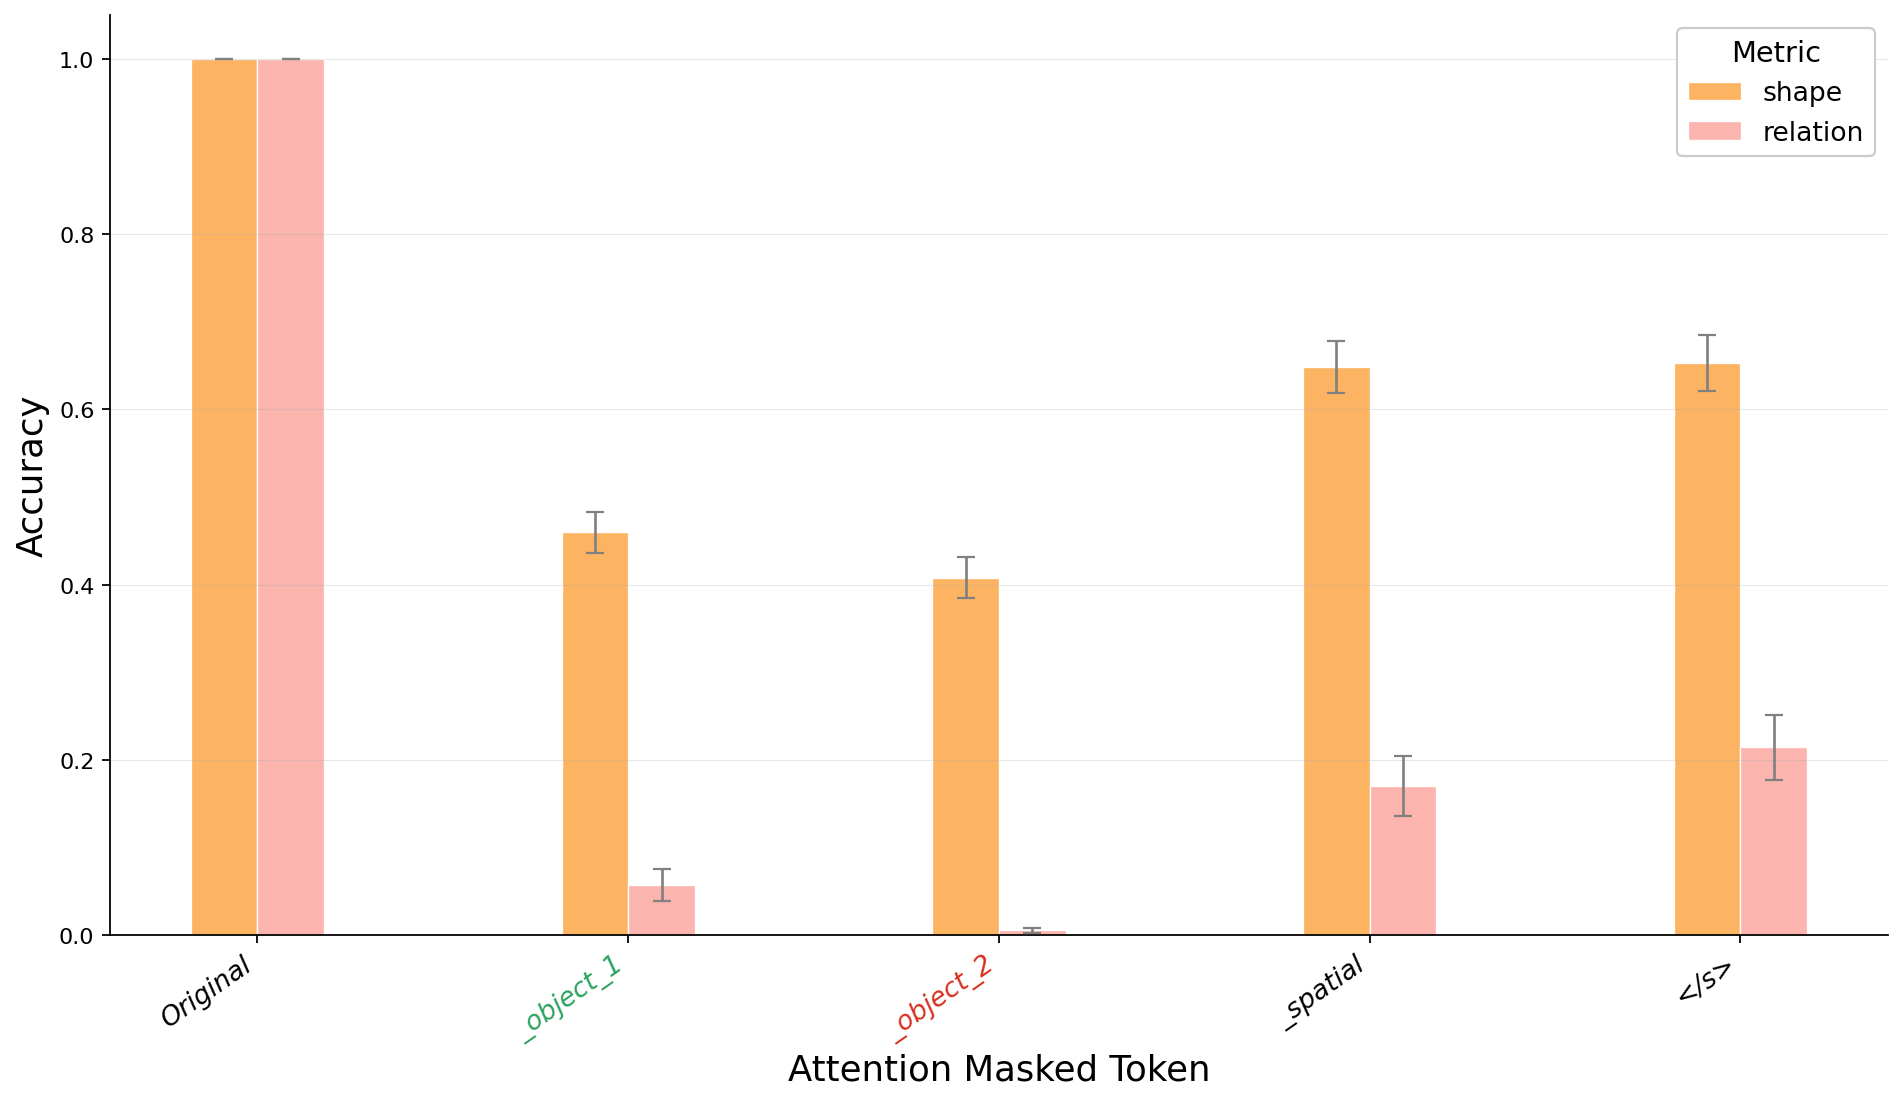

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Inputs you can change ====
labels = [
    "Original", "_object_1", "_object_2","_spatial", "</s>"
]

# Each metric -> list of accuracies (len == len(labels))
data = {
    #"color":    [1.00, 1.00, 1.00, 0.95, 0.00],
    "shape":    [1.00, 0.4598684210526316, 0.4078947368421052, 0.6486842105263159, 0.6532894736842104],
    #"bind":     [0.97, 0.96, 0.81, 0.47, 0.00],
    "relation": [1.00, 0.05707738171141374, 0.005739731049155872, 0.17003405787980008, 0.21416609541787407],
}
# Optional: per-metric error bars (same length as labels).
# Replace with your own standard errors or CI half-widths.
show_errorbars = True
errors = {
    "shape":    [0.00, 0.023283525853643496, 0.02369492934835717, 0.029676230730335523, 0.03198595533782756],
    "relation": [0.00, 0.018367548774579124, 0.0028424101924853064, 0.034358101612482206, 0.03667635840847688],
}
# Bars to emphasize with dashed outlines (group index -> outline color)
# (mimics the dashed outlines on tokens like _blue, _circle, _square)
dashed_groups = {
    1: "#1f77b4",   # _blue  -> blue outline
    2: "#d62728",   # _circle-> red outline
    4: "#d62728",  # _square-> red outline
}

# Color some tick labels (e.g., color-tokens green, shape-tokens red)
tick_label_color = {
    1: "#2ca25f",   # _blue
    9: "#2ca25f",   # _red (color token)
    2: "#d7301f",   # _circle (shape token)
    10: "#d7301f",  # _square (shape token)
}

# ==== Fixed style (matches screenshot palette) ====
#metrics = ["color", "shape", "bind", "relation"]
metrics = ["shape", "relation"]
palette = {
    "color":    "#8dd3c7",  # mint
    "shape":    "#fdb462",  # peach
    "bind":     "#bebada",  # lavender
    "relation": "#fbb4ae",  # pink
}

# ==== Plot ====
x = np.arange(len(labels))
width = 0.18

fig, ax = plt.subplots(figsize=(12, 7), dpi=160)
fig.set_facecolor("white")

# Draw grouped bars
bars_per_metric = {}
for i, m in enumerate(metrics):
    offs = (i - (len(metrics)-1)/2.0) * width
    bars = ax.bar(
        x + offs, data[m], width,
        label=m, color=palette[m], edgecolor="white", linewidth=0.6
    )
    bars_per_metric[m] = bars
# Add error bars on top of the bars
if show_errorbars:
    for i, m in enumerate(metrics):
        if m not in errors:
            continue
        offs = (i - (len(metrics) - 1) / 2.0) * width
        ax.errorbar(
            x + offs,
            data[m],
            yerr=errors[m],
            fmt="none",
            ecolor="gray",
            elinewidth=1.2,
            capsize=4,
            capthick=1.0,
            zorder=3,
        )
# Add dashed outlines on selected groups
# for grp_idx, outline_color in dashed_groups.items():
#     for m in metrics:
#         b = bars_per_metric[m][grp_idx]
#         b.set_edgecolor(outline_color)
#         b.set_linewidth(2.0)
#         b.set_linestyle((0, (4, 4)))  # dashed

# Axes, ticks, labels
ax.set_ylim(0, 1.05)
ax.set_ylabel("Accuracy", fontsize=16)
ax.set_xlabel("Attention Masked Token", fontsize=16)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=35, ha="right", fontsize=12)
for i, lbl in enumerate(ax.get_xticklabels()):
    if i in tick_label_color:
        lbl.set_color(tick_label_color[i])
    lbl.set_fontstyle("italic")  # to mimic the styled tokens

# Legend styled like the screenshot
leg = ax.legend(title="Metric", fontsize=12, title_fontsize=13, frameon=True)
leg.get_frame().set_alpha(1.0)

# Clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
def is_perfect_detection(entry) -> bool:
    return bool(entry.get("obj1_detected", False) and entry.get("obj2_detected", False))

# ----------------------------
# Load & filter to perfect detections (entry-level)
# ----------------------------
rows = []
missing = []
for seed, fp in seed_to_file.items():
    if not os.path.isfile(fp):
        missing.append((seed, fp))
        continue

    with open(fp, "r") as f:
        data = json.load(f)

    for e in data:
        if is_perfect_detection(e):
            rows.append({
                "seed": seed,
                "prompt": e.get("prompt"),
                "image": e.get("image"),
                "question_id": e.get("question_id"),
                "obj1": e.get("obj1"),
                "obj2": e.get("obj2"),
                "spatial_relationship_score": float(e.get("spatial_relationship_score", np.nan)),
                "obj1_confidence": float(e.get("obj1_confidence", np.nan)),
                "obj2_confidence": float(e.get("obj2_confidence", np.nan)),
            })

if missing:
    print("WARNING: Missing seed files:")
    for seed, fp in missing:
        print(f"  - seed {seed}: {fp}")

perfect_df = pd.DataFrame(rows)

print("\nPerfect detections (entry-level) with spatial_relationship_score:")
if perfect_df.empty:
    print("No entries with perfect object detection were found.")
else:
    display(perfect_df.head(20))
    print(f"... total rows: {len(perfect_df)}")

    overall_avg = perfect_df["spatial_relationship_score"].mean()
    print(f"\nOverall average spatial_relationship_score (entry-level, only perfect detections): {overall_avg:.4f}")

# ----------------------------
# Aggregation by (seed, prompt)
# - If you have multiple images per (seed, prompt), this averages their spatial scores.
# - We only keep (seed, prompt) pairs where *every* entry is a perfect detection
#   i.e., the mean detection score for that pair would be 1.0.
# ----------------------------

# First collect per-(seed,prompt) all entries to check if all are perfect
grouped = defaultdict(list)
for row in rows:
    grouped[(row["seed"], row["prompt"])].append(row)

agg_rows = []
for (seed, prompt), entries in grouped.items():
    # entries list already filtered to perfect ones,
    # but to enforce "every entry is perfect", we need to know total count for this (seed,prompt)
    # Reload just once per file to count total rows per (seed,prompt)
    # For efficiency, we can build a quick index while reading:
    pass

# Build an index of total rows per (seed,prompt) from original files
total_counts = defaultdict(int)
for seed, fp in seed_to_file.items():
    if not os.path.isfile(fp):
        continue
    with open(fp, "r") as f:
        data = json.load(f)
    for e in data:
        key = (seed, e.get("prompt"))
        total_counts[key] += 1

# Now compute aggregated spatial score for (seed,prompt) pairs where *all* entries are perfect
agg_rows = []
for (seed, prompt), entries in grouped.items():
    if total_counts[(seed, prompt)] == len(entries):  # all entries for this (seed,prompt) are perfect
        spatial_vals = [r["spatial_relationship_score"] for r in entries if pd.notna(r["spatial_relationship_score"])]
        agg_rows.append({
            "seed": seed,
            "prompt": prompt,
            "n_images_for_pair": len(entries),
            "avg_spatial_relationship_score": float(np.mean(spatial_vals)) if spatial_vals else np.nan,
            "min_spatial_relationship_score": float(np.min(spatial_vals)) if spatial_vals else np.nan,
            "max_spatial_relationship_score": float(np.max(spatial_vals)) if spatial_vals else np.nan,
        })

agg_df = pd.DataFrame(agg_rows).sort_values(
    ["avg_spatial_relationship_score", "seed", "prompt"], ascending=[False, True, True]
).reset_index(drop=True)

print("\n(Seed, Prompt) groups where *every* image achieved perfect detection; averaged spatial_relationship_score:")
if agg_df.empty:
    print("No (seed, prompt) groups with 100% perfect detections across their images.")
else:
    display(agg_df.head(20))
    print(f"... total groups: {len(agg_df)}")

    overall_group_avg = agg_df["avg_spatial_relationship_score"].mean()
    print(f"\nOverall average of avg_spatial_relationship_score across these groups: {overall_group_avg:.4f}")

Prompt × Seed spatial_relationship_score (only where detection is perfect; NaN = no perfect detection):


,seed_1,seed_2,seed_3,seed_4,seed_5,seed_6,seed_7,seed_8,seed_9,seed_10
a bee on the top of a boy,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
a bee on the top of a woman,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a person on the top of a car,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
a lamp on the top of a sheep,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
a girl on the top of a desk,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
a balloon on the top of a frog,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
a balloon on the top of a bird,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
a man on the top of a turtle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
a vase on the top of a turtle,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
a turtle on the top of a car,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN


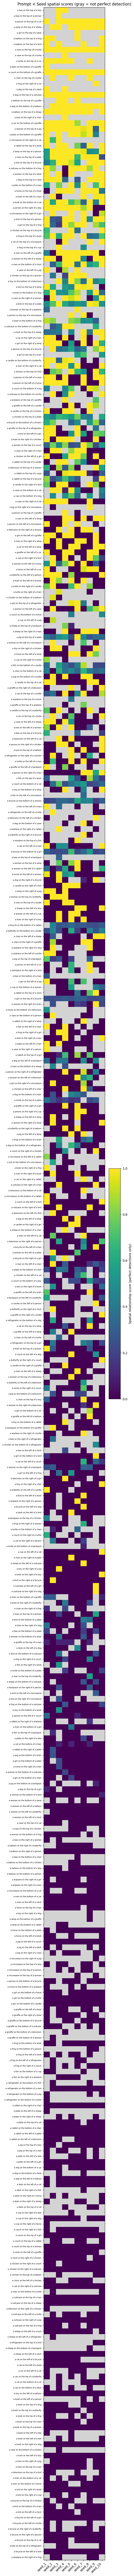

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import display

# ----------------------------
# Config (same layout as before)
# ----------------------------
root_dir  = "../examples/labels/2025-05-06_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"
root_dir2 = "../examples/labels/2025-05-10_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"

seed_to_file = {}
for s in range(1, 11):
    base = root_dir if s <= 5 else root_dir2
    seed_to_file[s] = os.path.join(f"{base}{s}", "annotation_obj_detection_2d", "detailed_scores.json")

def is_perfect(entry) -> bool:
    return bool(entry.get("obj1_detected", False) and entry.get("obj2_detected", False))

# ----------------------------
# Load perfect-detection entries
# ----------------------------
pairs_to_scores = defaultdict(list)  # (prompt, seed) -> list of spatial_relationship_score for perfect entries
missing = []
for seed, fp in seed_to_file.items():
    if not os.path.isfile(fp):
        missing.append((seed, fp))
        continue
    with open(fp, "r") as f:
        data = json.load(f)
    for e in data:
        if is_perfect(e):
            s = e.get("spatial_relationship_score", np.nan)
            if s is not None:
                pairs_to_scores[(e.get("prompt"), seed)].append(float(s))

if missing:
    print("WARNING: Missing seed files:")
    for seed, fp in missing:
        print(f"  - seed {seed}: {fp}")

if not pairs_to_scores:
    print("No prompt–seed combinations with perfect object detection were found.")
else:
    # ----------------------------
    # Build pivot (prompt × seed) of mean spatial score for perfect-only entries
    # ----------------------------
    prompts = sorted({p for (p, _) in pairs_to_scores.keys()})
    # Filter out prompts containing these phrases
    exclude_phrases = ("near", "next to", "on side of")
    prompts = [p for p in prompts if not any(phrase in p.lower() for phrase in exclude_phrases)]
    seeds   = sorted({s for (_, s) in pairs_to_scores.keys()})

    # mean per (prompt, seed)
    mean_map = {(p, s): float(np.mean(vals)) for (p, s), vals in pairs_to_scores.items()}

    # Create DataFrame with NaN for absent (non-perfect) combos
    mat = np.full((len(prompts), len(seeds)), np.nan, dtype=float)
    for i, p in enumerate(prompts):
        for j, s in enumerate(seeds):
            if (p, s) in mean_map:
                mat[i, j] = mean_map[(p, s)]

    pivot_df = pd.DataFrame(mat, index=prompts, columns=[f"seed_{s}" for s in seeds])

    # Optionally sort prompts by their across-seed mean (descending) for readability
    row_means = np.nanmean(mat, axis=1)
    order = np.argsort(-row_means)  # descending
    pivot_df = pivot_df.iloc[order]

    print("Prompt × Seed spatial_relationship_score (only where detection is perfect; NaN = no perfect detection):")
    display(pivot_df.head(20))  # show a slice; remove .head(20) to see all

    # ----------------------------
    # Heatmap (gray where NaN => no perfect detection)
    # ----------------------------
    mat_sorted = pivot_df.to_numpy()
    masked = np.ma.masked_invalid(mat_sorted)

    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color='lightgray')  # gray out non-perfect combos

    h, w = mat_sorted.shape
    plt.figure(figsize=(max(6, 0.6 * w), max(4, 0.25 * h)))
    im = plt.imshow(masked, aspect='auto', interpolation='nearest', vmin=0, vmax=1, cmap=cmap)
    plt.colorbar(im, label="Spatial relationship score (perfect detections only)")
    plt.yticks(ticks=np.arange(h), labels=pivot_df.index, fontsize=6)
    plt.xticks(ticks=np.arange(w), labels=pivot_df.columns, rotation=45, ha="right")
    plt.title("Prompt × Seed spatial scores (gray = not perfect detection)")
    plt.tight_layout()
    plt.show()


In [1]:
import json
import os
from collections import defaultdict

# List of seed files to process
root_dir = "../examples/labels/2025-05-06_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"
root_dir2 = "../examples/labels/2025-05-10_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"
seed_files = [
    root_dir+"1/annotation_obj_detection_2d/detailed_scores.json",
    root_dir+"2/annotation_obj_detection_2d/detailed_scores.json",
    root_dir+"3/annotation_obj_detection_2d/detailed_scores.json",
    root_dir+"4/annotation_obj_detection_2d/detailed_scores.json",
    root_dir+"5/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"6/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"7/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"8/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"9/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"10/annotation_obj_detection_2d/detailed_scores.json"
]

# Dictionary to store entries where both objects are correctly generated
correct_entries = defaultdict(dict)
# Dictionary to track which entries have both objects detected in each seed
detection_status = defaultdict(lambda: defaultdict(bool))

# First pass: collect detection status for all entries across all seeds
for seed_file in seed_files:
    seed_num = int(seed_file.split('seed')[-1].split('/')[0])
    
    with open(seed_file, 'r') as f:
        data = json.load(f)
        
    for entry in data:
        key = f"{entry['prompt']}_{entry['image']}"
        detection_status[key][f'seed_{seed_num}'] = entry['obj1_detected'] and entry['obj2_detected']

# Second pass: only process entries that have both objects detected in ALL seeds
for seed_file in seed_files:
    seed_num = int(seed_file.split('seed')[-1].split('/')[0])
    
    with open(seed_file, 'r') as f:
        data = json.load(f)
        
    for entry in data:
        key = f"{entry['prompt']}_{entry['image']}"
        
        # Check if this entry has both objects detected in ALL seeds
        if all(detection_status[key].values()):
            if key not in correct_entries:
                # Initialize the entry with the first occurrence
                correct_entries[key] = {
                    'question_id': entry['question_id'],
                    'image': entry['image'],
                    'prompt': entry['prompt'],
                    'locality': entry['locality'],
                    'obj1': entry['obj1'],
                    'obj2': entry['obj2'],
                    'obj1_detected': entry['obj1_detected'],
                    'obj2_detected': entry['obj2_detected'],
                    'obj1_confidence': entry['obj1_confidence'],
                    'obj2_confidence': entry['obj2_confidence'],
                    'spatial_relationship_score': {},
                    'final_score': entry['final_score']
                }
            
            # Add the spatial relationship score for this seed
            correct_entries[key]['spatial_relationship_score'][f'seed_{seed_num}'] = entry['spatial_relationship_score']

# Convert the dictionary to a list
#combined_scores = list(correct_entries.values())

# Save the combined scores


In [15]:

filtered_entries = {}
unfiltered_entries = {}

for key, entry in correct_entries.items():
    spatial_scores = list(entry['spatial_relationship_score'].values())
    
    # Calculate average score
    avg_score = sum(spatial_scores) / len(spatial_scores)
    
    # Check if average > 0.9
    if avg_score >= 0.9:
        filtered_entries[key] = entry
    else:
        unfiltered_entries[key] = entry

# Convert binary mask dictionary to 2D array
# Convert to dictionary with prompt IDs as keys
binary_mask_dict = {}
unfiltered_mask_dict = {}

for entry in filtered_entries.values():
    scores = []
    for seed_num in range(1, 11):  # Assuming 10 seeds
        seed_key = f'seed_{seed_num}'
        score = 1 if entry['spatial_relationship_score'][seed_key] > 0.5 else 0
        scores.append(score)
    binary_mask_dict[entry['question_id']] = scores
binary_mask = binary_mask_dict

for entry in unfiltered_entries.values():
    scores = []
    for seed_num in range(1, 11):
        seed_key = f'seed_{seed_num}'
        score = 1 if entry['spatial_relationship_score'][seed_key] > 0.5 else 0
        scores.append(score)
    unfiltered_mask_dict[entry['question_id']] = scores

binary_mask = binary_mask_dict
unfiltered_mask = unfiltered_mask_dict



# Convert the dictionary to a list
combined_scores = list(filtered_entries.values())

In [16]:
unfiltered_mask

{3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 18: [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
 22: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 23: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 59: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 67: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 83: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 85: [0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
 86: [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 92: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 93: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 94: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 99: [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 103: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 104: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 114: [0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
 138: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 144: [1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
 150: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 151: [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 158: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 168: [1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
 170: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 182: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 183: [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 203: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 220: [0, 0, 0, 0, 0, 0, 0

In [6]:
#binary_mask
import pickle

# Save binary mask as pickle file
with open('binary_mask.pkl', 'wb') as f:
    pickle.dump(binary_mask, f)


In [7]:
filtered_qids = [list(i.values())[0] for i in combined_scores]

In [8]:
with open('filtered_qids.json', 'w') as f:
    json.dump(filtered_qids, f)

In [21]:
import pickle
# Load prompts from spatial.txt
with open('/n/home13/xupan/sompolinsky_lab/DiffusionObjectRelation/PixArt-alpha/asset/spatial.txt', 'r') as f:
    prompts = [line.strip() for line in f if line.strip()]

# Load binary mask from pickle file
# with open('/n/home13/xupan/holylabs/DiffusionObjectRelation/analysis_script/binary_mask.pkl', 'rb') as f:
#     binary_mask = pickle.load(f)

# Get prompt IDs from binary mask keys
mask_keys = list(unfiltered_mask.keys())

# Filter prompts based on binary mask keys
filtered_prompts = []
for idx, prompt in enumerate(prompts):
    if idx in mask_keys:
        filtered_prompts.append(prompt)

# Save filtered prompts to new txt file
with open('low_accuracy_spatial_prompt.txt', 'w') as f:
    for prompt in filtered_prompts:
        f.write(prompt + '\n')

print(f"Original prompts: {len(prompts)}")
print(f"Filtered prompts: {len(filtered_prompts)}")


Original prompts: 1000
Filtered prompts: 114
